In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal
from PIL import Image

# lineCode
from lineCoding import unrz_l
from lineCoding import manchester

ModuleNotFoundError: ignored

In [ ]:
%cd "/content/drive/MyDrive/DataComm_Project"

(720, 960, 3)


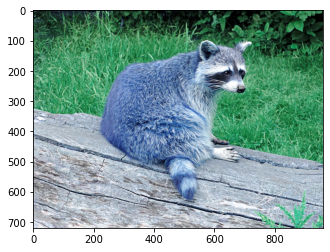

In [ ]:
# Source image
img = cv2.imread("raccoon-2378172_960_720.jpg", 1)
x,y,z=img.shape[0], img.shape[1], img.shape[2]
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
# Format data
binary_data = np.unpackbits(img, axis=2)
bitstream = binary_data.ravel()
print(bitstream.shape)

(16588800,)


In [ ]:
# prepare for encoding stage
amplitude = 5
t = 0.5
sampling_rate = 10
n = t*sampling_rate

In [ ]:
# encode using uniporlar non-return to zero
signal = unrz_l.encode(bitstream, amplitude, n)
print(signal.shape)

(82944000,)


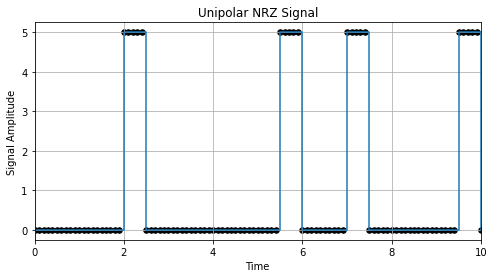

[0 0 0 ... 0 1 0]


In [ ]:
# plot signal after encode
unrz_l.draw_signal(signal, amplitude, t, sampling_rate)
print(bitstream)

In [ ]:
# decode the unrz_l
decode = unrz_l.decode(signal, n)
print(decode.shape)

In [ ]:
# convert 8 bits to 0-255 decimal
decode_dec = np.packbits(decode).reshape((x,y,z))
# print("Result\n",decode_dec)
# print("-----------------------")
# print("Origin data\n", img)

In [ ]:
# convert 3D array to image
de_img = Image.fromarray(decode_dec)
print(decode_dec.shape)
# display the image
plt.imshow(de_img)
plt.show()